In [1]:
import pandas as pd
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})

# Análise de leitos no Brasil

In [2]:
PATH_TO_DATA1 = "../dados/brutos/total_leitos_por_uf.csv"
PATH_TO_DATA2 = "../dados/brutos/leitos_sus_por_uf.csv"

In [3]:
total_df = pd.read_csv(PATH_TO_DATA1, sep=";")
sus_df = pd.read_csv(PATH_TO_DATA2, sep=";")

In [4]:
sus_df.head()

,Região/Unidade da Federação,Quantidade_SUS
0,Região Norte,24255
1,Rondônia,3360
2,Acre,1350
3,Amazonas,4899
4,Roraima,1064


In [5]:
total_df.head()

,Região/Unidade da Federação,Quantidade_existente
0,Região Norte,30375
1,Rondônia,4259
2,Acre,1484
3,Amazonas,5684
4,Roraima,1133


In [6]:
sus_df.set_index('Região/Unidade da Federação', inplace=True)
total_df.set_index('Região/Unidade da Federação', inplace=True)

In [7]:
leitos_df = sus_df.join(total_df)

In [8]:
leitos_df

,Quantidade_SUS,Quantidade_existente
Região/Unidade da Federação,,
Região Norte,24255,30375
Rondônia,3360,4259
Acre,1350,1484
Amazonas,4899,5684
Roraima,1064,1133
Pará,10347,13670
Amapá,947,1092
Tocantins,2288,3053
Região Nordeste,91176,114102


In [9]:
# Separando região e UF
leitos_df["Unidade"] = "UF"
for index in leitos_df.index:
    if "Região" in index:
        leitos_df["Unidade"].loc[index] = "Região"

In [10]:
leitos_df

,Quantidade_SUS,Quantidade_existente,Unidade
Região/Unidade da Federação,,,
Região Norte,24255,30375,Região
Rondônia,3360,4259,UF
Acre,1350,1484,UF
Amazonas,4899,5684,UF
Roraima,1064,1133,UF
Pará,10347,13670,UF
Amapá,947,1092,UF
Tocantins,2288,3053,UF
Região Nordeste,91176,114102,Região


In [11]:
leitos_estado_df = leitos_df[leitos_df["Unidade"] == "UF"].drop(columns=["Unidade"])
leitos_regiao_df = leitos_df[leitos_df["Unidade"] == "Região"].drop(columns=["Unidade"])

In [12]:
leitos_estado_df

,Quantidade_SUS,Quantidade_existente
Região/Unidade da Federação,,
Rondônia,3360,4259
Acre,1350,1484
Amazonas,4899,5684
Roraima,1064,1133
Pará,10347,13670
Amapá,947,1092
Tocantins,2288,3053
Maranhão,12201,13768
Piauí,6470,7463


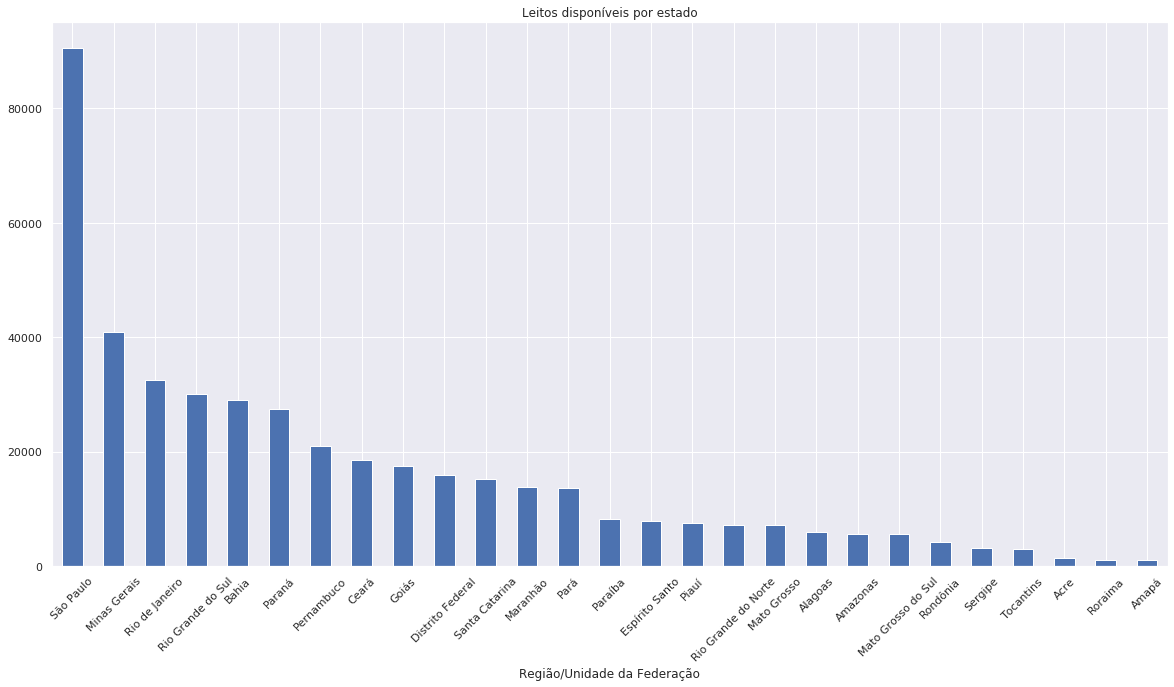

In [24]:
leitos_estado_df.sort_values(by="Quantidade_existente", ascending=False, inplace=True)
leitos_estado_df["Quantidade_existente"].plot.bar(rot=45, title="Leitos disponíveis por estado")

In [14]:
leitos_regiao_df

,Quantidade_SUS,Quantidade_existente
Região/Unidade da Federação,,
Região Norte,24255,30375
Região Nordeste,91176,114102
Região Sudeste,105706,171834
Região Sul,49706,72786
Região Centro-Oeste,23437,46161


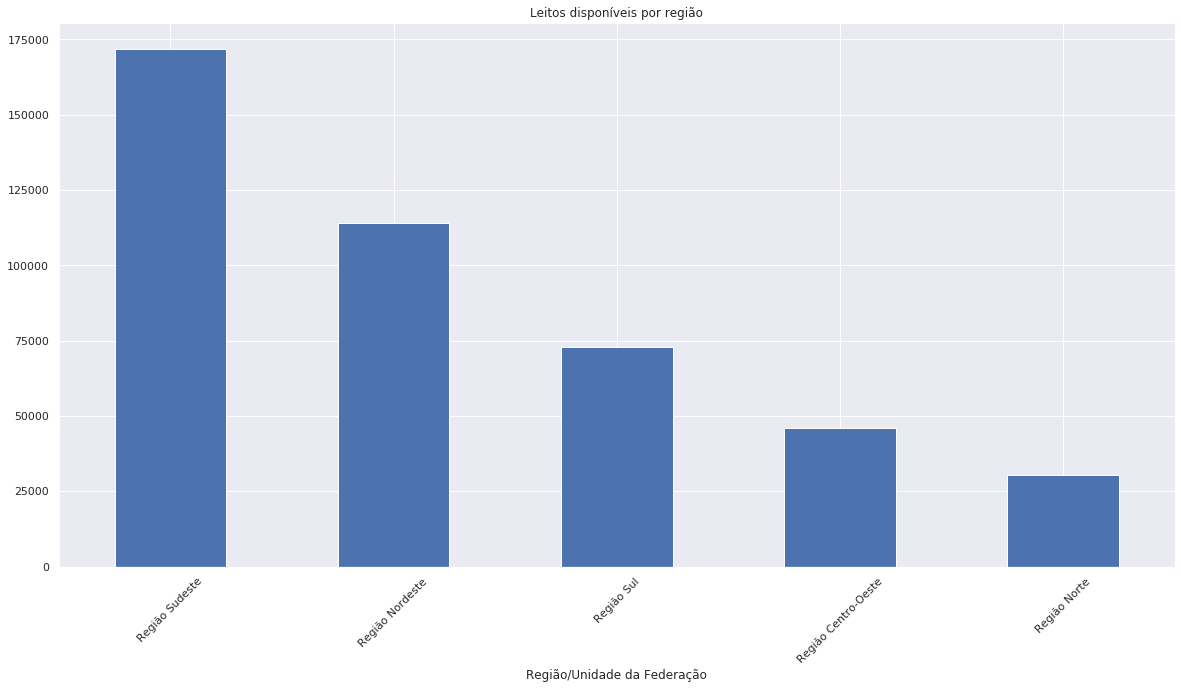

In [25]:
leitos_regiao_df.sort_values(by="Quantidade_existente", ascending=False, inplace=True)
leitos_regiao_df["Quantidade_existente"].plot.bar(rot=45, title="Leitos disponíveis por região")

In [16]:
# Salvando arquivos
leitos_estado_df.to_excel("../dados/processados/leitos_por_estado_jan20.xlsx")
leitos_regiao_df.to_excel("../dados/processados/leitos_por_regiao_jan20.xlsx")

# Análise de unidades básicas de saúde (UBS)

In [17]:
PATH_TO_DATA3  = "../dados/brutos/ubs_funcionamentonone.csv.csv"

In [18]:
ubs_df = pd.read_csv(PATH_TO_DATA3)

In [19]:
ubs_df.drop(columns=["gid", "co_cnes", "lat", "long", "no_fantasia", "nu_endereco", "no_bairro", "no_logradouro", "co_cep", "nu_telefone", "cidade"], inplace=True)

In [20]:
ubs_df["total"] = 0
ubs_df

,uf,ano_ubs_det,mes_ubs_det,total
0,MG,2016,5,0
1,PR,2016,5,0
2,CE,2016,5,0
3,BA,2016,5,0
4,PB,2016,5,0
...,...,...,...,...
40607,MG,2016,5,0
40608,SP,2016,5,0
40609,SP,2016,5,0
40610,MT,2016,5,0


In [21]:
ubs_df = ubs_df[["uf", "total"]].groupby("uf").count()
ubs_df.sort_values(by="total", ascending=False, inplace=True)

In [22]:
ubs_df.head(5)

,total
uf,
MG,5118
SP,4769
BA,3684
PE,2400
PR,2310


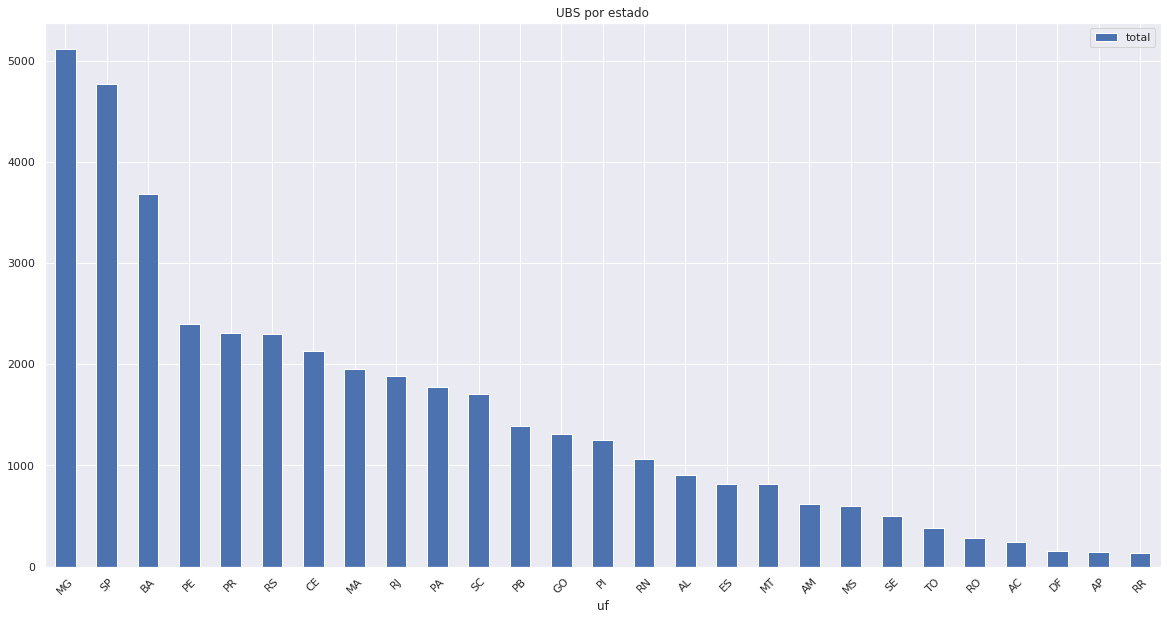

In [26]:
ubs_df.plot.bar(rot=45, title="UBS por estado")

In [27]:
leitos_regiao_df.to_excel("../dados/processados/ubs_por_estado.xlsx")